In [1]:
from imblearn.metrics import geometric_mean_score
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data


files=['AAPL','AMZN','PEP','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','BKNG','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       


prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    #priceData = get_price_data(param)
    #stock = StockDataFrame.retype(priceData)
    #price = pd.DataFrame(stock)
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']
    #stock.get(string)
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDatasetUpdated/'+file+'.csv')
    print(price)
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price)

/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                         open      high       low     close   volume  \
2017-08-15 00:15:00  159.3200  159.4200  159.1300  159.1400   353429   
2017-08-15 00:30:00  159.1499  159.3100  159.0800  159.1576   278415   
2017-08-15 00:45:00  159.1600  159.2500  159.0500  159.2000   310227   
2017-08-15 01:00:00  159.2000  159.3700  159.1800  159.3500   267756   
2017-08-15 01:15:00  159.3600  159.4464  159.2300  159.4464   410015   
2017-08-15 01:30:00  159.4499  159.9361  159.4400  159.9000  1232639   
2017-08-15 01:45:00  159.8703  160.0400  159.8199  159.9025   823263   
2017-08-15 02:00:00  159.9100  159.9337  159.7400  159.9000   463923   
2017-08-15 02:15:00  159.9000  160.1500  159.8700  159.9810   633243   
2017-08-15 02:30:00  159.9850  160.0400  159.8300  159.9001   376880   
2017-08-15 02:45:00  159.9000  159.9850  159.8300  159.9657   337043   
2017-08-15 03:00:00  159.9600  159.9799  159.4600  159.6014   620341   
2017-08-15 03:15:00  159.6000  159.7500  159.5500  159.6900   47

                          open       high        low      close  volume  \
2017-08-15 00:15:00   981.7200   983.0000   981.4200   982.4400   61109   
2017-08-15 00:30:00   982.8100   982.8600   981.3900   981.7600   54881   
2017-08-15 00:45:00   981.6110   981.7400   980.8200   981.1800   25816   
2017-08-15 01:00:00   981.0100   981.9548   981.0100   981.8400   28824   
2017-08-15 01:15:00   981.9636   983.3300   981.8665   982.3900   41671   
2017-08-15 01:30:00   982.5300   982.7300   981.8500   982.1618   29050   
2017-08-15 01:45:00   982.1250   982.3600   981.3900   982.1350   70427   
2017-08-15 02:00:00   982.1679   982.4499   980.5000   981.3100   69027   
2017-08-15 02:15:00   981.2600   981.8000   981.2498   981.3400   20468   
2017-08-15 02:30:00   981.2800   982.3500   980.5000   982.3500   31126   
2017-08-15 02:45:00   982.3000   982.6100   981.7000   982.0200   50472   
2017-08-15 03:00:00   981.8900   982.3787   980.6200   981.6900   32865   
2017-08-15 03:15:00   981

                         open      high       low     close   volume  \
2017-12-20 22:30:00  118.6600  118.7100  118.6600  118.7000    43248   
2017-12-20 22:45:00  118.9500  119.1200  117.5600  117.8200    69261   
2017-12-20 23:00:00  117.8200  118.3200  117.7700  118.2300   163492   
2017-12-20 23:15:00  118.2200  118.4200  118.0900  118.1800    49993   
2017-12-20 23:30:00  118.1800  118.2452  118.0600  118.2400    40796   
2017-12-20 23:45:00  118.2400  118.2500  118.0000  118.1000    43877   
2017-12-21 00:00:00  118.1300  118.2400  118.0500  118.1200    41672   
2017-12-21 00:15:00  118.1101  118.2100  118.0600  118.0600    32619   
2017-12-21 00:30:00  118.0874  118.1400  117.9200  118.0899    28223   
2017-12-21 00:45:00  118.0900  118.0900  117.9300  118.0500    31569   
2017-12-21 01:00:00  118.0500  118.1700  117.9900  118.0050    28177   
2017-12-21 01:15:00  118.0108  118.0900  117.9000  118.0000    87431   
2017-12-21 01:30:00  117.9850  118.1000  117.9850  118.0200    4

                          open       high        low      close  volume  \
2017-08-15 00:15:00   939.1890   939.9500   939.0900   939.2050   15381   
2017-08-15 00:30:00   939.2500   939.8000   938.6945   938.6945   13825   
2017-08-15 00:45:00   938.6750   938.6750   937.2200   937.9800   14380   
2017-08-15 01:00:00   937.8000   938.5100   937.8000   938.3700    9407   
2017-08-15 01:15:00   938.2000   939.6400   938.2000   939.3600   14784   
2017-08-15 01:30:00   939.6080   939.6080   938.7000   939.2300   10256   
2017-08-15 01:45:00   939.0200   939.3800   938.6900   938.9200    9651   
2017-08-15 02:00:00   938.8700   938.9500   938.1900   938.6600   13348   
2017-08-15 02:15:00   938.5500   939.2000   938.4200   938.6700    8626   
2017-08-15 02:30:00   938.7900   938.7900   937.8050   938.1000   17009   
2017-08-15 02:45:00   938.2000   939.5700   938.0400   939.5200   14085   
2017-08-15 03:00:00   939.5150   939.7000   938.5001   939.6300   10875   
2017-08-15 03:15:00   939

                         open      high       low     close   volume  \
2017-08-15 00:15:00   73.5000   73.5800   73.4800   73.5600   316364   
2017-08-15 00:30:00   73.5600   73.6000   73.5200   73.5300   274514   
2017-08-15 00:45:00   73.5350   73.5500   73.4900   73.5400   266033   
2017-08-15 01:00:00   73.5500   73.5850   73.5300   73.5605   330928   
2017-08-15 01:15:00   73.5700   73.7000   73.5700   73.6900   311297   
2017-08-15 01:30:00   73.6802   73.7000   73.5700   73.6150   278677   
2017-08-15 01:45:00   73.6200   73.6450   73.5600   73.6100   339100   
2017-08-15 02:00:00   73.6100   73.6700   73.5800   73.6300   404107   
2017-08-15 02:15:00   73.6250   73.7200   73.6050   73.6900   445035   
2017-08-15 02:30:00   73.6900   73.6900   73.5800   73.6048   371091   
2017-08-15 02:45:00   73.6000   73.6652   73.6000   73.6150   406881   
2017-08-15 03:00:00   73.6200   73.6300   73.5250   73.5900   591197   
2017-08-15 03:15:00   73.6000   73.6100   73.4700   73.5000   42

                         open      high       low     close   volume  \
2017-08-15 00:15:00  170.3666  170.5099  170.2900  170.3400   250392   
2017-08-15 00:30:00  170.3400  170.6000  170.3300  170.4780   189451   
2017-08-15 00:45:00  170.4900  170.5600  170.2400  170.5500   215744   
2017-08-15 01:00:00  170.5600  170.6300  170.4600  170.6200   222657   
2017-08-15 01:15:00  170.6200  170.8900  170.5900  170.8800   346787   
2017-08-15 01:30:00  170.8800  170.9600  170.8000  170.9369   234725   
2017-08-15 01:45:00  170.9200  171.0800  170.8200  170.8452   299744   
2017-08-15 02:00:00  170.8550  170.8600  170.6510  170.7500   243408   
2017-08-15 02:15:00  170.7500  170.7900  170.5600  170.6500   219276   
2017-08-15 02:30:00  170.6500  170.7700  170.4900  170.6546   194368   
2017-08-15 02:45:00  170.6600  170.9200  170.6600  170.8950   166038   
2017-08-15 03:00:00  170.9000  170.9400  170.5500  170.7000   233468   
2017-08-15 03:15:00  170.6988  170.7100  170.4156  170.6300   23

                        open     high      low    close   volume  close_2_sma  \
2017-08-15 00:15:00  36.3600  36.4300  36.3500  36.4050   742210     36.40500   
2017-08-15 00:30:00  36.4050  36.4600  36.3700  36.4600   606949     36.43250   
2017-08-15 00:45:00  36.4550  36.4700  36.4200  36.4250   277719     36.44250   
2017-08-15 01:00:00  36.4200  36.4300  36.3500  36.3600   325415     36.39250   
2017-08-15 01:15:00  36.3550  36.4200  36.3450  36.3950   317431     36.37750   
2017-08-15 01:30:00  36.3950  36.4000  36.3548  36.3650   223870     36.38000   
2017-08-15 01:45:00  36.3650  36.3750  36.3300  36.3510   285171     36.35800   
2017-08-15 02:00:00  36.3500  36.3800  36.3250  36.3700   342793     36.36050   
2017-08-15 02:15:00  36.3635  36.3750  36.3400  36.3400   427492     36.35500   
2017-08-15 02:30:00  36.3400  36.3600  36.3200  36.3400   296408     36.34000   
2017-08-15 02:45:00  36.3336  36.3600  36.3205  36.3400   345122     36.34000   
2017-08-15 03:00:00  36.3300

                        open     high      low    close    volume  \
2017-08-15 00:15:00  31.7650  31.8100  31.7600  31.7950    696789   
2017-08-15 00:30:00  31.7900  31.8100  31.7750  31.7910    311572   
2017-08-15 00:45:00  31.7950  31.8400  31.7800  31.8350    440198   
2017-08-15 01:00:00  31.8350  31.8700  31.8150  31.8350    398501   
2017-08-15 01:15:00  31.8400  31.8700  31.8300  31.8500    371758   
2017-08-15 01:30:00  31.8450  31.8600  31.8200  31.8319    270167   
2017-08-15 01:45:00  31.8310  31.8400  31.7700  31.7950    729311   
2017-08-15 02:00:00  31.8000  31.8100  31.7600  31.7950    442886   
2017-08-15 02:15:00  31.7952  31.8100  31.7700  31.7859    487257   
2017-08-15 02:30:00  31.7826  31.8100  31.7700  31.8000    342144   
2017-08-15 02:45:00  31.7900  31.8154  31.7800  31.7900    454575   
2017-08-15 03:00:00  31.7914  31.8000  31.7450  31.7801    810864   
2017-08-15 03:15:00  31.7900  31.8000  31.7750  31.7900    523530   
2017-08-15 03:30:00  31.7900  31.8

                        open     high      low    close    volume  \
2017-08-15 00:15:00  41.6390  41.7550  41.6200  41.7500    327471   
2017-08-15 00:30:00  41.7450  41.8350  41.6900  41.6900    492166   
2017-08-15 00:45:00  41.6900  41.7484  41.6900  41.7102    350444   
2017-08-15 01:00:00  41.7150  41.7600  41.7126  41.7600    184054   
2017-08-15 01:15:00  41.7600  41.8550  41.7550  41.8350    346118   
2017-08-15 01:30:00  41.8301  41.8400  41.7600  41.7650    239853   
2017-08-15 01:45:00  41.7600  41.7850  41.7400  41.7800    246656   
2017-08-15 02:00:00  41.7800  41.8250  41.7600  41.8200    307557   
2017-08-15 02:15:00  41.8128  41.8150  41.7500  41.7500    438064   
2017-08-15 02:30:00  41.7500  41.7650  41.7100  41.7404    366468   
2017-08-15 02:45:00  41.7400  41.8200  41.7400  41.7800    505778   
2017-08-15 03:00:00  41.7900  41.8300  41.7350  41.8250    712913   
2017-08-15 03:15:00  41.8250  41.8400  41.7900  41.8050    372217   
2017-08-15 03:30:00  41.8000  41.8

                         open      high       low     close   volume  \
2017-08-15 00:15:00  164.4051  165.2200  164.0600  165.0000  1289616   
2017-08-15 00:30:00  164.9600  165.5000  164.7100  165.1477  1000995   
2017-08-15 00:45:00  165.1548  165.8100  165.0410  165.2810   954260   
2017-08-15 01:00:00  165.3000  165.5983  164.8500  165.0010   692479   
2017-08-15 01:15:00  165.0400  165.9400  164.7200  165.7300  1022162   
2017-08-15 01:30:00  165.7202  165.8400  165.4000  165.5452   436095   
2017-08-15 01:45:00  165.5500  165.9800  165.0600  165.3000   559288   
2017-08-15 02:00:00  165.3000  165.7500  165.0600  165.6600   407715   
2017-08-15 02:15:00  165.6400  166.1999  165.3800  165.9850   521627   
2017-08-15 02:30:00  165.9900  166.5800  165.5900  166.3787   896496   
2017-08-15 02:45:00  166.3400  166.7500  166.0500  166.1800   652408   
2017-08-15 03:00:00  166.1550  166.2850  165.6200  166.0200   720383   
2017-08-15 03:15:00  166.0200  166.4600  165.9100  166.2118   46

                         open      high       low     close   volume  \
2017-08-15 00:15:00  170.0660  170.1400  169.6100  169.8000   186358   
2017-08-15 00:30:00  169.8199  170.3200  169.8199  170.0500   149169   
2017-08-15 00:45:00  170.0773  170.2900  169.9500  170.2568   110109   
2017-08-15 01:00:00  170.2400  170.5000  170.1800  170.2600    74896   
2017-08-15 01:15:00  170.3000  170.6126  170.2200  170.6126    84924   
2017-08-15 01:30:00  170.6500  170.9500  170.5700  170.8500   103172   
2017-08-15 01:45:00  170.8325  171.2400  170.7600  171.1810   151688   
2017-08-15 02:00:00  171.2100  171.2132  170.7900  171.0600   123010   
2017-08-15 02:15:00  171.0647  171.2300  170.8112  170.8112    86517   
2017-08-15 02:30:00  170.8000  170.8600  170.4000  170.6100    88961   
2017-08-15 02:45:00  170.6100  170.8200  170.4600  170.4600    63517   
2017-08-15 03:00:00  170.5100  170.5100  169.9110  170.2100   147592   
2017-08-15 03:15:00  170.2100  170.3500  170.0500  170.2628    8

                          open       high        low     close  volume  \
2018-02-27 22:30:00  1884.0000  1884.0000  1884.0000  1884.000    3311   
2018-02-27 22:45:00  1870.0200  1919.0000  1870.0200  1904.200    9567   
2018-02-27 23:00:00  1902.2450  1912.2650  1896.8650  1897.990   21868   
2018-02-27 23:15:00  1902.8100  1903.0100  1892.9200  1892.920   12981   
2018-02-27 23:30:00  1892.9300  1897.0000  1892.7550  1895.550    9370   
2018-02-27 23:45:00  1895.4600  1907.8900  1894.3450  1901.850   10115   
2018-02-28 00:00:00  1902.2100  1907.7600  1896.4850  1903.700    7035   
2018-02-28 00:15:00  1905.7100  1905.7100  1899.6800  1900.510    8788   
2018-02-28 00:30:00  1903.2399  1903.2399  1894.5100  1897.010    4718   
2018-02-28 00:45:00  1900.0000  1903.0800  1896.5000  1900.400    5424   
2018-02-28 01:00:00  1900.2300  1902.4700  1899.4100  1900.000    6926   
2018-02-28 01:15:00  1900.4200  1902.9100  1899.7200  1900.440    7972   
2018-02-28 01:30:00  1899.4000  1900.1

                         open      high       low     close  volume  \
2017-08-15 00:15:00  149.0500  149.2200  148.9400  149.1048   20958   
2017-08-15 00:30:00  149.1300  149.2050  148.9900  149.1104   18798   
2017-08-15 00:45:00  149.0950  149.1887  148.9100  149.0960   19508   
2017-08-15 01:00:00  149.1200  149.2400  149.0700  149.2000   11109   
2017-08-15 01:15:00  149.2000  149.4300  149.2000  149.4300   21626   
2017-08-15 01:30:00  149.4500  149.4700  149.3000  149.4000   12208   
2017-08-15 01:45:00  149.4000  149.5000  149.3500  149.3926   14519   
2017-08-15 02:00:00  149.3400  149.4500  149.2050  149.3400   11905   
2017-08-15 02:15:00  149.3000  149.4700  149.2600  149.4200   20521   
2017-08-15 02:30:00  149.3700  149.5000  149.3179  149.4100   12201   
2017-08-15 02:45:00  149.3900  149.4500  149.3200  149.3900   12814   
2017-08-15 03:00:00  149.3900  149.4300  149.1300  149.2700   15714   
2017-08-15 03:15:00  149.2675  149.2800  149.0300  149.1200   20227   
2017-0

                         open      high       low     close   volume  \
2017-08-15 00:15:00  171.5300  171.7900  171.4600  171.4900    46899   
2017-08-15 00:30:00  171.4910  171.5100  171.3300  171.3500    29374   
2017-08-15 00:45:00  171.3500  171.5400  171.2800  171.4800    24331   
2017-08-15 01:00:00  171.5000  171.8300  171.5000  171.8100    25432   
2017-08-15 01:15:00  171.8300  171.8900  171.6900  171.8300    24434   
2017-08-15 01:30:00  171.8100  171.8500  171.6900  171.7400    15599   
2017-08-15 01:45:00  171.7300  171.7800  171.5600  171.6500    22730   
2017-08-15 02:00:00  171.6500  171.8200  171.5200  171.8100    27802   
2017-08-15 02:15:00  171.8200  171.9300  171.7500  171.8200    31548   
2017-08-15 02:30:00  171.8100  171.9500  171.7500  171.8701    22028   
2017-08-15 02:45:00  171.8700  172.0760  171.8601  172.0300    19088   
2017-08-15 03:00:00  172.0129  172.0129  171.5300  171.6000    49427   
2017-08-15 03:15:00  171.5910  171.6400  171.4392  171.5100    3

                         open     high       low     close   volume  \
2017-08-15 00:15:00   81.9800   82.100   81.9700   82.0400    67118   
2017-08-15 00:30:00   82.0400   82.050   81.9350   82.0016    40810   
2017-08-15 00:45:00   81.9800   82.020   81.9000   81.9000    76765   
2017-08-15 01:00:00   81.9100   82.000   81.8900   81.9000    30491   
2017-08-15 01:15:00   81.9100   82.030   81.7900   81.9900    65173   
2017-08-15 01:30:00   82.0000   82.010   81.9300   81.9400    34883   
2017-08-15 01:45:00   81.9300   81.940   81.8600   81.9000    58628   
2017-08-15 02:00:00   81.9000   81.950   81.8100   81.9000    53261   
2017-08-15 02:15:00   81.9200   81.940   81.8500   81.8800    71454   
2017-08-15 02:30:00   81.8700   81.910   81.7700   81.9000    63514   
2017-08-15 02:45:00   81.8900   81.940   81.8900   81.9100    37836   
2017-08-15 03:00:00   81.9100   81.929   81.7800   81.8900    40388   
2017-08-15 03:15:00   81.8700   81.910   81.8200   81.8499    84993   
2017-0

                         open      high       low     close   volume  \
2017-08-15 00:15:00  249.9800  250.2300  249.9200  249.9200    32227   
2017-08-15 00:30:00  249.9000  250.0100  249.6900  249.7300    27682   
2017-08-15 00:45:00  249.7500  249.8400  249.5700  249.7100    12445   
2017-08-15 01:00:00  249.6550  249.7300  249.5201  249.6700    18889   
2017-08-15 01:15:00  249.6700  250.2500  249.6700  250.2000    24905   
2017-08-15 01:30:00  250.2000  250.2500  250.0400  250.1900    14319   
2017-08-15 01:45:00  250.1900  250.4400  250.1650  250.4180    16168   
2017-08-15 02:00:00  250.4400  250.6900  250.3500  250.6900    48745   
2017-08-15 02:15:00  250.7000  251.1800  250.6877  250.7200    49262   
2017-08-15 02:30:00  250.6400  250.7200  250.1400  250.1840    28222   
2017-08-15 02:45:00  250.1500  250.6250  250.0700  250.4500    25259   
2017-08-15 03:00:00  250.4500  250.4600  249.7496  249.8900    28178   
2017-08-15 03:15:00  249.8500  250.2600  249.8000  250.2100    3

                        open     high      low    close   volume  close_2_sma  \
2017-08-15 00:15:00  58.7000  58.8050  58.6700  58.7750   135634     58.77500   
2017-08-15 00:30:00  58.7750  58.8100  58.7200  58.7600   126058     58.76750   
2017-08-15 00:45:00  58.7700  58.8300  58.7200  58.8100   124913     58.78500   
2017-08-15 01:00:00  58.8200  58.9700  58.8149  58.9700   126356     58.89000   
2017-08-15 01:15:00  58.9700  59.0300  58.9200  59.0200   152411     58.99500   
2017-08-15 01:30:00  59.0100  59.0910  58.9900  59.0900   187901     59.05500   
2017-08-15 01:45:00  59.0800  59.1800  59.0800  59.1550   150573     59.12250   
2017-08-15 02:00:00  59.1550  59.2700  59.1500  59.2700   272688     59.21250   
2017-08-15 02:15:00  59.2700  59.2763  59.1900  59.1900   156172     59.23000   
2017-08-15 02:30:00  59.1900  59.1900  59.0300  59.0500   115500     59.12000   
2017-08-15 02:45:00  59.0500  59.1100  59.0400  59.0500   105777     59.05000   
2017-08-15 03:00:00  59.0400

                        open     high      low    close   volume  close_2_sma  \
2017-08-15 00:15:00  72.7900  72.8551  72.6801  72.6900   131069     72.69000   
2017-08-15 00:30:00  72.6900  72.7950  72.6800  72.7000    60245     72.69500   
2017-08-15 00:45:00  72.7000  72.7900  72.6700  72.7800   160234     72.74000   
2017-08-15 01:00:00  72.7810  72.8990  72.7600  72.8800   145021     72.83000   
2017-08-15 01:15:00  72.8800  72.9100  72.8450  72.8850    84344     72.88250   
2017-08-15 01:30:00  72.8800  72.9200  72.8400  72.8950    76320     72.89000   
2017-08-15 01:45:00  72.8900  72.9000  72.8300  72.8355    57390     72.86525   
2017-08-15 02:00:00  72.8300  72.8400  72.7300  72.8400    94982     72.83775   
2017-08-15 02:15:00  72.8400  72.8515  72.7500  72.7850   126275     72.81250   
2017-08-15 02:30:00  72.7900  72.8100  72.7300  72.7643   116336     72.77465   
2017-08-15 02:45:00  72.7600  72.8600  72.7400  72.8558   106918     72.81005   
2017-08-15 03:00:00  72.8500

                         open      high       low     close  volume  \
2017-08-15 00:15:00  157.9018  157.9700  157.8500  157.9001   27773   
2017-08-15 00:30:00  157.9000  157.9800  157.8000  157.8200   22273   
2017-08-15 00:45:00  157.8100  157.9785  157.7900  157.9500   30213   
2017-08-15 01:00:00  157.9500  158.0900  157.9500  158.0800   27384   
2017-08-15 01:15:00  158.0600  158.2000  158.0500  158.1200   36425   
2017-08-15 01:30:00  158.1000  158.1200  157.8300  157.9800   31427   
2017-08-15 01:45:00  157.9700  158.0200  157.8100  157.9300   32301   
2017-08-15 02:00:00  157.9500  158.0700  157.8600  158.0700   34107   
2017-08-15 02:15:00  158.0422  158.0901  157.9100  157.9200   27517   
2017-08-15 02:30:00  157.9150  157.9900  157.8900  157.9299   30123   
2017-08-15 02:45:00  157.9000  157.9300  157.7400  157.8246   32975   
2017-08-15 03:00:00  157.8500  157.8800  157.6700  157.7470   35647   
2017-08-15 03:15:00  157.7700  157.8500  157.6900  157.7500   23591   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-08-15 00:15:00  53.1900  53.3500  53.1850  53.3500   121320     53.35000   
2017-08-15 00:30:00  53.3500  53.3800  53.2800  53.2800   125775     53.31500   
2017-08-15 00:45:00  53.2854  53.3200  53.2750  53.2843    90936     53.28215   
2017-08-15 01:00:00  53.2850  53.3500  53.2700  53.3300   100582     53.30715   
2017-08-15 01:15:00  53.3300  53.4100  53.3300  53.3700   130657     53.35000   
2017-08-15 01:30:00  53.3759  53.3800  53.3000  53.3000   116647     53.33500   
2017-08-15 01:45:00  53.3000  53.3500  53.2950  53.3300    80688     53.31500   
2017-08-15 02:00:00  53.3258  53.3800  53.3000  53.3800   132018     53.35500   
2017-08-15 02:15:00  53.3900  53.4700  53.3800  53.4400   249314     53.41000   
2017-08-15 02:30:00  53.4400  53.4400  53.3600  53.4350   145858     53.43750   
2017-08-15 02:45:00  53.4350  53.5350  53.4300  53.4900   296823     53.46250   
2017-08-15 03:00:00  53.4842

In [2]:
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt

Working on... AAPL
4.773580450037433
0.0
Diff in tren train and test
0.5047291487532244
0.5395869191049913
F1,score 0.4700374531835206
G-score: 0.5080842667744393
Window: 5
[[345 190]
 [376 251]]
Vol pos 0.3933029427501836
Vol neg 0.3387376747429285


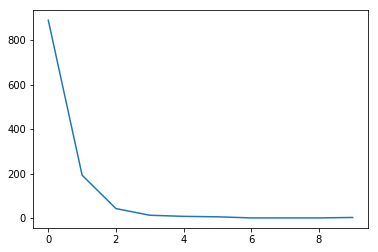

Percentage of gain: 0.036732383799149664
Total gain: 42.68302997461191
000000000000000000000000000000000000000000000000
Percentile:  0
[[272 140]
 [301 176]]
0.5039370078740157
Percentile:  1
[[53 44]
 [51 45]]
0.5077720207253886
Percentile:  2
[[11  4]
 [11 17]]
0.6511627906976745
Percentile:  3
[[6 0]
 [4 3]]
0.6923076923076923
Percentile:  4
[[3 1]
 [2 2]]
0.625
Percentile:  5
[[0 1]
 [1 4]]
0.6666666666666666
Percentile:  6
[[1]]
1.0
Percentile:  7
[[1]]
1.0
Percentile:  8
[[0 0]
 [1 0]]
0.0
Percentile:  9
[[0 0]
 [2 1]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... AMZN
7.308881753895251
0.0
Diff in tren train and test
0.5287035046226618
0.5464716006884681
F1,score 0.3852631578947369
G-score: 0.4647634024375571
Window: 5
[[395 132]
 [452 183]]
Vol pos 0.4447874314452009
Vol neg 0.324244767355916


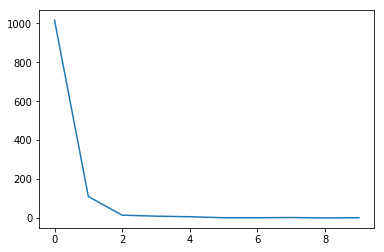

Percentage of gain: 0.05828587886357243
Total gain: 67.72819123947116
000000000000000000000000000000000000000000000000
Percentile:  0
[[344 120]
 [405 147]]
0.48326771653543305
Percentile:  1
[[36  8]
 [40 26]]
0.5636363636363636
Percentile:  2
[[6 3]
 [4 1]]
0.5
Percentile:  3
[[5 0]
 [2 2]]
0.7777777777777778
Percentile:  4
[[4 1]
 [0 1]]
0.8333333333333334
Percentile:  5
[[1]]
1.0
Percentile:  6
[[1]]
1.0
Percentile:  7
[[2]]
1.0
Percentile:  8
Percentile:  9
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... PEP
2.374602523335739
0.0
Diff in tren train and test
0.4720700985761227
0.5891812865497076
F1,score 0.5849802371541502
G-score: 0.5368209688964867
Window: 5
[[147 134]
 [181 222]]
Vol pos 0.31684585811649885
Vol neg 0.3048495122886624


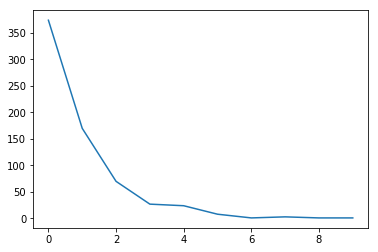

Percentage of gain: 0.030538779640437747
Total gain: 20.88852527405942
000000000000000000000000000000000000000000000000
Percentile:  0
[[ 88  93]
 [ 70 123]]
0.5641711229946524
Percentile:  1
[[35 26]
 [60 49]]
0.49411764705882355
Percentile:  2
[[11 10]
 [24 25]]
0.5142857142857142
Percentile:  3
[[ 5  3]
 [ 8 11]]
0.5925925925925926
Percentile:  4
[[ 1  0]
 [14  9]]
0.4166666666666667
Percentile:  5
[[3 1]
 [1 3]]
0.75
Percentile:  6
[[1]]
1.0
Percentile:  7
[[2 1]
 [0 0]]
0.6666666666666666
Percentile:  8
[[1]]
1.0
Percentile:  9
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
3.5436802973977795
0.0
Diff in tren train and test
0.5220382713394969
0.5103270223752151
F1,score 0.5279605263157896
G-score: 0.5039931885434201
Window: 5
[[267 302]
 [272 321]]
Vol pos 0.43402815616724727
Vol neg 0.4219530418803766


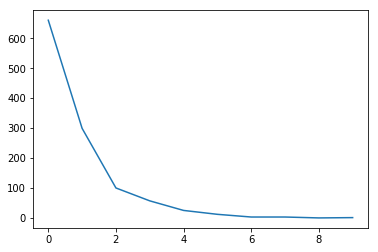

Percentage of gain: 0.011194070384686087
Total gain: 13.007509787005233
000000000000000000000000000000000000000000000000
Percentile:  0
[[187 170]
 [154 149]]
0.509090909090909
Percentile:  1
[[ 40  82]
 [ 75 102]]
0.47491638795986624
Percentile:  2
[[16 31]
 [19 34]]
0.5
Percentile:  3
[[15 11]
 [12 19]]
0.5964912280701754
Percentile:  4
[[ 6  2]
 [ 6 11]]
0.68
Percentile:  5
[[0 3]
 [5 4]]
0.3333333333333333
Percentile:  6
[[0 1]
 [1 1]]
0.3333333333333333
Percentile:  7
[[3]]
1.0
Percentile:  8
Percentile:  9
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... MSFT
3.3750512925728415
0.0
Diff in tren train and test
0.5268701633705933
0.5395869191049913
F1,score 0.44612476370510395
G-score: 0.48908551257870836
Window: 5
[[340 195]
 [391 236]]
Vol pos 0.41117127947338283
Vol neg 0.3832876908405503


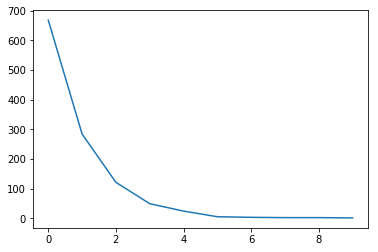

Percentage of gain: 0.010523296165323628
Total gain: 12.228070144106056
000000000000000000000000000000000000000000000000
Percentile:  0
[[195 122]
 [228 123]]
0.47604790419161674
Percentile:  1
[[83 38]
 [94 69]]
0.5352112676056338
Percentile:  2
[[31 19]
 [45 26]]
0.47107438016528924
Percentile:  3
[[17  7]
 [13 12]]
0.5918367346938775
Percentile:  4
[[9 4]
 [7 4]]
0.5416666666666666
Percentile:  5
[[1 3]
 [1 0]]
0.2
Percentile:  6
[[1 2]
 [0 0]]
0.3333333333333333
Percentile:  7
[[0 0]
 [1 1]]
0.5
Percentile:  8
[[1 0]
 [0 1]]
1.0
Percentile:  9
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... FB
8.887813391777962
0.0
Diff in tren train and test
0.5159071367153912
0.5473321858864028
F1,score 0.4461538461538461
G-score: 0.49547779197622105
Window: 5
[[354 172]
 [404 232]]
Vol pos 0.447739002316375
Vol neg 0.4829466212055907


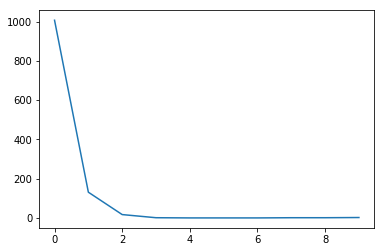

Percentage of gain: -0.013599138086940167
Total gain: -15.802198457024474
000000000000000000000000000000000000000000000000
Percentile:  0
[[310 151]
 [344 202]]
0.5084409136047666
Percentile:  1
[[41 17]
 [50 23]]
0.48854961832061067
Percentile:  2
[[3 4]
 [6 4]]
0.4117647058823529
Percentile:  3
[[0 0]
 [1 0]]
0.0
Percentile:  4
Percentile:  5
Percentile:  6
Percentile:  7
[[1]]
1.0
Percentile:  8
[[0 0]
 [1 0]]
0.0
Percentile:  9
[[0 0]
 [1 1]]
0.5
000000000000000000000000000000000000000000000000
Working on... INTC
4.841390548614877
0.0
Diff in tren train and test
0.5331040412725709
0.5301204819277109
F1,score 0.5642633228840126
G-score: 0.5131355770661177
Window: 5
[[246 300]
 [256 360]]
Vol pos 0.5429933281820934
Vol neg 0.5767278100467541


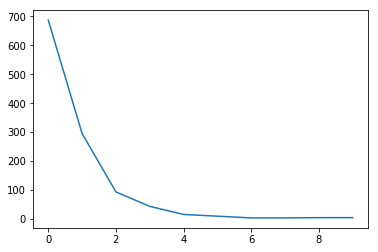

Percentage of gain: 0.007223145002025245
Total gain: 8.393294492353334
000000000000000000000000000000000000000000000000
Percentile:  0
[[155 169]
 [145 218]]
0.5429403202328966
Percentile:  1
[[61 72]
 [71 91]]
0.5152542372881356
Percentile:  2
[[14 30]
 [23 26]]
0.43010752688172044
Percentile:  3
[[11 14]
 [ 6 12]]
0.5348837209302325
Percentile:  4
[[1 5]
 [4 5]]
0.4
Percentile:  5
[[0 5]
 [2 2]]
0.2222222222222222
Percentile:  6
[[0 1]
 [0 2]]
0.6666666666666666
Percentile:  7
[[0 3]
 [0 0]]
0.0
Percentile:  8
[[1 1]
 [1 1]]
0.5
Percentile:  9
[[2 0]
 [0 2]]
1.0
000000000000000000000000000000000000000000000000
Working on... CSCO
4.398891966759002
0.0
Diff in tren train and test
0.5435390238658353
0.5430292598967298
F1,score 0.48896434634974534
G-score: 0.4835248019683825
Window: 5
[[272 259]
 [343 288]]
Vol pos 0.432000161907316
Vol neg 0.4031934188005404


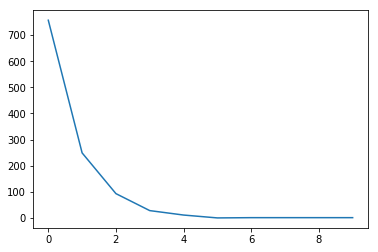

Percentage of gain: -0.0006904883389228698
Total gain: -0.8023474498283747
000000000000000000000000000000000000000000000000
Percentile:  0
[[176 169]
 [233 179]]
0.46895640686922063
Percentile:  1
[[55 58]
 [68 68]]
0.4939759036144578
Percentile:  2
[[26 21]
 [25 21]]
0.5053763440860215
Percentile:  3
[[9 6]
 [6 7]]
0.5714285714285714
Percentile:  4
[[4 2]
 [0 5]]
0.8181818181818182
Percentile:  5
Percentile:  6
[[1]]
1.0
Percentile:  7
[[0 1]
 [0 0]]
0.0
Percentile:  8
[[0 1]
 [0 0]]
0.0
Percentile:  9
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
4.520795660036167
0.0
Diff in tren train and test
0.4968823908836809
0.5060240963855421
F1,score 0.49534450651769085
G-score: 0.5281993228309971
Window: 5
[[354 220]
 [322 266]]
Vol pos 0.5845680035419754
Vol neg 0.532068353489636


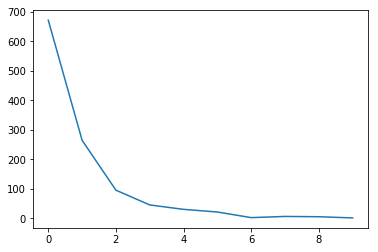

Percentage of gain: 0.06372729311931326
Total gain: 74.05111460464201
000000000000000000000000000000000000000000000000
Percentile:  0
[[216 136]
 [180 139]]
0.5290611028315947
Percentile:  1
[[70 49]
 [83 62]]
0.5
Percentile:  2
[[30 15]
 [25 25]]
0.5789473684210527
Percentile:  3
[[17 10]
 [ 7 11]]
0.6222222222222222
Percentile:  4
[[11  4]
 [ 5 10]]
0.7
Percentile:  5
[[8 3]
 [4 6]]
0.6666666666666666
Percentile:  6
[[0 0]
 [2 0]]
0.0
Percentile:  7
[[1 3]
 [1 1]]
0.3333333333333333
Percentile:  8
[[1 0]
 [1 3]]
0.8
Percentile:  9
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... NVDA
4.5136708118745545
0.0010269576379964985
Diff in tren train and test
0.5253654342218401
0.5378657487091222
F1,score 0.3760683760683761
G-score: 0.45913691194524375
Window: 5
[[402 135]
 [449 176]]
Vol pos 0.602655292027564
Vol neg 0.5529789028548169


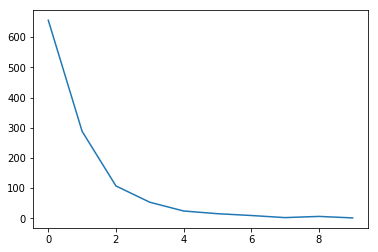

Percentage of gain: 0.021854629539344993
Total gain: 25.39507952471888
000000000000000000000000000000000000000000000000
Percentile:  0
[[245  76]
 [260  74]]
0.4870229007633588
Percentile:  1
[[ 89  30]
 [115  54]]
0.4965277777777778
Percentile:  2
[[30 10]
 [45 23]]
0.49074074074074076
Percentile:  3
[[18  9]
 [16  9]]
0.5192307692307693
Percentile:  4
[[7 4]
 [7 6]]
0.5416666666666666
Percentile:  5
[[6 1]
 [3 5]]
0.7333333333333333
Percentile:  6
[[3 4]
 [1 1]]
0.4444444444444444
Percentile:  7
[[0 1]
 [0 1]]
0.5
Percentile:  8
[[2 0]
 [1 3]]
0.8333333333333334
Percentile:  9
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... NFLX
3.8751268005680726
0.0
Diff in tren train and test
0.5201032036121265
0.540447504302926
F1,score 0.5370967741935483
G-score: 0.5032013025103017
Window: 5
[[255 279]
 [295 333]]
Vol pos 0.572565815916936
Vol neg 0.6032715185503974


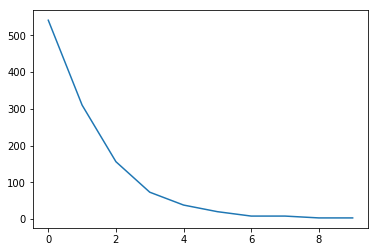

Percentage of gain: -0.008269493880180515
Total gain: -9.609151888769759
000000000000000000000000000000000000000000000000
Percentile:  0
[[146 143]
 [114 138]]
0.5249537892791127
Percentile:  1
[[61 84]
 [83 82]]
0.4612903225806452
Percentile:  2
[[25 22]
 [47 62]]
0.5576923076923077
Percentile:  3
[[16 10]
 [25 22]]
0.5205479452054794
Percentile:  4
[[ 3  7]
 [15 13]]
0.42105263157894735
Percentile:  5
[[1 6]
 [5 8]]
0.45
Percentile:  6
[[2 2]
 [2 2]]
0.5
Percentile:  7
[[0 3]
 [2 3]]
0.375
Percentile:  8
[[0 1]
 [1 1]]
0.3333333333333333
Percentile:  9
[[1 1]
 [0 1]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... BKNG
1.6144990738787033
6.591425854902371e-05
Diff in tren train and test
0.5090600226500567
0.5079365079365079
F1,score 0.5492957746478874
G-score: 0.5636714267085828
Window: 5
[[132  85]
 [107 117]]
Vol pos 0.2789242905739505
Vol neg 0.30531022700492744


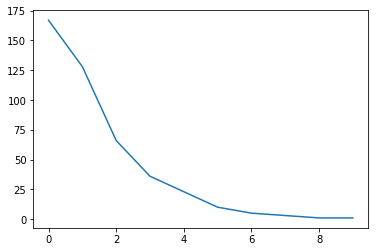

Percentage of gain: 0.024563684281105693
Total gain: 10.832584767967612
000000000000000000000000000000000000000000000000
Percentile:  0
[[51 34]
 [35 46]]
0.5843373493975904
Percentile:  1
[[38 25]
 [28 37]]
0.5859375
Percentile:  2
[[17 12]
 [23 14]]
0.4696969696969697
Percentile:  3
[[10  3]
 [11 12]]
0.6111111111111112
Percentile:  4
[[10  3]
 [ 5  5]]
0.6521739130434783
Percentile:  5
[[1 2]
 [4 3]]
0.4
Percentile:  6
[[3 1]
 [1 0]]
0.6
Percentile:  7
[[0 3]
 [0 0]]
0.0
Percentile:  8
[[0 1]
 [0 0]]
0.0
Percentile:  9
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... ADBE
3.2369780539910624
0.0
Diff in tren train and test
0.5487962166809974
0.5456110154905336
F1,score 0.5312741312741313
G-score: 0.4656491973911989
Window: 5
[[211 317]
 [290 344]]
Vol pos 0.4670019514184471
Vol neg 0.477946709264859


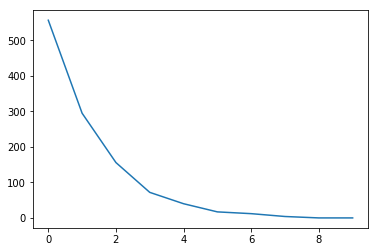

Percentage of gain: -0.02661580850820249
Total gain: -30.927569486531297
000000000000000000000000000000000000000000000000
Percentile:  0
[[106 162]
 [129 160]]
0.47755834829443444
Percentile:  1
[[55 74]
 [83 83]]
0.46779661016949153
Percentile:  2
[[25 33]
 [47 51]]
0.48717948717948717
Percentile:  3
[[15 20]
 [15 22]]
0.5138888888888888
Percentile:  4
[[ 6 14]
 [ 6 14]]
0.5
Percentile:  5
[[2 4]
 [6 5]]
0.4117647058823529
Percentile:  6
[[2 5]
 [1 4]]
0.5
Percentile:  7
[[0 4]
 [0 0]]
0.0
Percentile:  8
Percentile:  9
000000000000000000000000000000000000000000000000
Working on... AMGN
3.401709401709401
0.0
Diff in tren train and test
0.5054826918942164
0.5301204819277109
F1,score 0.5063078216989066
G-score: 0.4951899839588037
Window: 5
[[274 272]
 [315 301]]
Vol pos 0.4489410127884199
Vol neg 0.45166687040177805


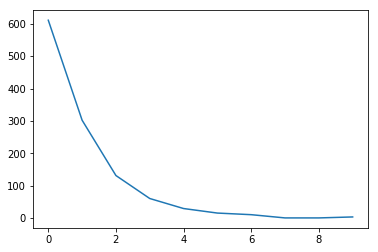

Percentage of gain: -0.006013227687179211
Total gain: -6.987370572502243
000000000000000000000000000000000000000000000000
Percentile:  0
[[158 142]
 [160 151]]
0.5057283142389526
Percentile:  1
[[70 66]
 [90 76]]
0.48344370860927155
Percentile:  2
[[21 36]
 [40 34]]
0.4198473282442748
Percentile:  3
[[15 13]
 [11 21]]
0.6
Percentile:  4
[[ 4  5]
 [ 9 11]]
0.5172413793103449
Percentile:  5
[[2 6]
 [3 4]]
0.4
Percentile:  6
[[3 2]
 [2 3]]
0.6
Percentile:  7
Percentile:  8
Percentile:  9
[[1 2]
 [0 0]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... TXN
4.164969450101836
0.0
Diff in tren train and test
0.5557944528058482
0.5593803786574871
F1,score 0.5008431703204047
G-score: 0.49359174679080686
Window: 5
[[273 239]
 [353 297]]
Vol pos 0.4378637506512102
Vol neg 0.4741418490231128


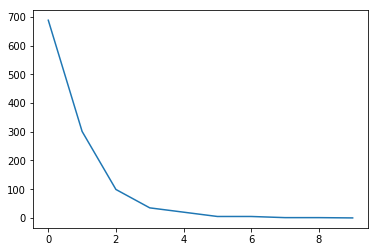

Percentage of gain: -0.026772492900596356
Total gain: -31.109636750492967
000000000000000000000000000000000000000000000000
Percentile:  0
[[164 145]
 [200 179]]
0.498546511627907
Percentile:  1
[[70 63]
 [90 78]]
0.49169435215946844
Percentile:  2
[[22 15]
 [40 22]]
0.4444444444444444
Percentile:  3
[[9 9]
 [8 9]]
0.5142857142857142
Percentile:  4
[[7 7]
 [2 4]]
0.55
Percentile:  5
[[1 0]
 [3 1]]
0.4
Percentile:  6
[[0 0]
 [4 1]]
0.2
Percentile:  7
[[1]]
1.0
Percentile:  8
[[0 0]
 [1 0]]
0.0
Percentile:  9
000000000000000000000000000000000000000000000000
Working on... AVGO
3.4749471777844883
0.0
Diff in tren train and test
0.5183831434100193
0.5559380378657487
F1,score 0.5351437699680511
G-score: 0.4962086559258698
Window: 5
[[245 271]
 [311 335]]
Vol pos 0.4989489888405889
Vol neg 0.4659847332543954


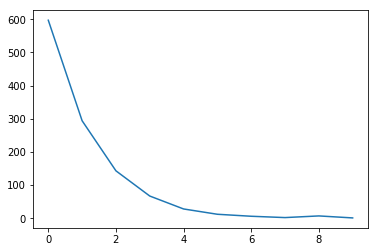

Percentage of gain: 0.015651720114873893
Total gain: 18.187298773483462
000000000000000000000000000000000000000000000000
Percentile:  0
[[131 152]
 [153 161]]
0.48911222780569513
Percentile:  1
[[ 58  63]
 [ 68 105]]
0.5544217687074829
Percentile:  2
[[29 32]
 [48 34]]
0.4405594405594406
Percentile:  3
[[ 6 19]
 [22 20]]
0.3880597014925373
Percentile:  4
[[ 4  3]
 [13  8]]
0.42857142857142855
Percentile:  5
[[5 2]
 [2 3]]
0.6666666666666666
Percentile:  6
[[2 0]
 [2 2]]
0.6666666666666666
Percentile:  7
[[2]]
1.0
Percentile:  8
[[6 0]
 [1 0]]
0.8571428571428571
Percentile:  9
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... PYPL
5.473098330241182
0.0
Diff in tren train and test
0.5421324161650903
0.5499139414802066
F1,score 0.4969271290605794
G-score: 0.5090408758723769
Window: 5
[[306 217]
 [356 283]]
Vol pos 0.5694420948451746
Vol neg 0.5352817510006264


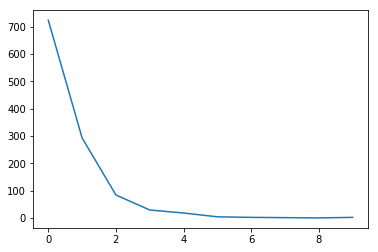

Percentage of gain: 0.024685843838596382
Total gain: 28.684950540448995
000000000000000000000000000000000000000000000000
Percentile:  0
[[196 137]
 [222 169]]
0.5041436464088398
Percentile:  1
[[68 57]
 [95 73]]
0.4812286689419795
Percentile:  2
[[19 12]
 [29 24]]
0.5119047619047619
Percentile:  3
[[13  6]
 [ 3  7]]
0.6896551724137931
Percentile:  4
[[5 4]
 [3 6]]
0.6111111111111112
Percentile:  5
[[1 0]
 [3 0]]
0.25
Percentile:  6
[[0 1]
 [1 0]]
0.0
Percentile:  7
[[1]]
1.0
Percentile:  8
Percentile:  9
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.556849694952859
0.0
Diff in tren train and test
0.5032258064516129
0.5292598967297762
F1,score 0.5932203389830507
G-score: 0.4552473937363324
Window: 5
[[166 381]
 [195 420]]
Vol pos 0.44670393206353015
Vol neg 0.45470008924191735


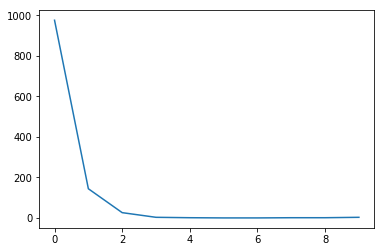

Percentage of gain: -0.00011940379872264238
Total gain: -0.13874721411571045
000000000000000000000000000000000000000000000000
Percentile:  0
[[143 315]
 [168 350]]
0.5051229508196722
Percentile:  1
[[21 53]
 [22 48]]
0.4791666666666667
Percentile:  2
[[ 0  7]
 [ 1 18]]
0.6923076923076923
Percentile:  3
[[0 2]
 [0 1]]
0.3333333333333333
Percentile:  4
[[0 1]
 [0 0]]
0.0
Percentile:  5
Percentile:  6
Percentile:  7
[[1]]
1.0
Percentile:  8
[[0 1]
 [0 0]]
0.0
Percentile:  9
[[1 2]
 [0 0]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... COST
2.3891650603631978
0.0
Diff in tren train and test
0.5283748925193466
0.5507745266781411
F1,score 0.374085684430512
G-score: 0.453593569659868
Window: 5
[[384 138]
 [461 179]]
Vol pos 0.3272487386781732
Vol neg 0.3376585659955366


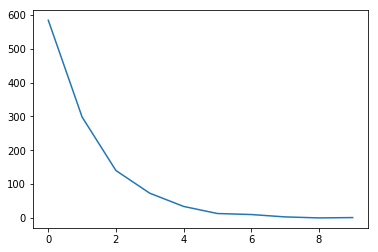

Percentage of gain: -0.015504682577895768
Total gain: -18.016441155514883
000000000000000000000000000000000000000000000000
Percentile:  0
[[193  71]
 [230  90]]
0.4845890410958904
Percentile:  1
[[100  43]
 [113  42]]
0.47651006711409394
Percentile:  2
[[49 13]
 [46 32]]
0.5785714285714286
Percentile:  3
[[25 11]
 [30  7]]
0.4383561643835616
Percentile:  4
[[ 4  0]
 [23  7]]
0.3235294117647059
Percentile:  5
[[6 0]
 [7 0]]
0.46153846153846156
Percentile:  6
[[6 0]
 [4 0]]
0.6
Percentile:  7
[[1 0]
 [2 0]]
0.3333333333333333
Percentile:  8
Percentile:  9
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... QCOM
4.096021487325832
0.0
Diff in tren train and test
0.5124677558039553
0.5507745266781411
F1,score 0.47387387387387386
G-score: 0.49797542696609937
Window: 5
[[315 207]
 [377 263]]
Vol pos 0.48379255908930896
Vol neg 0.48991727493556875


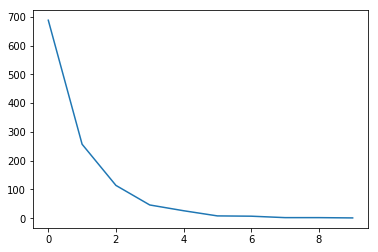

Percentage of gain: -0.005576238733865375
Total gain: -6.479589408751565
000000000000000000000000000000000000000000000000
Percentile:  0
[[193 122]
 [216 157]]
0.5087209302325582
Percentile:  1
[[71 43]
 [92 51]]
0.47470817120622566
Percentile:  2
[[28 30]
 [33 23]]
0.4473684210526316
Percentile:  3
[[13 11]
 [11 11]]
0.5217391304347826
Percentile:  4
[[ 8  1]
 [11  6]]
0.5384615384615384
Percentile:  5
[[2 0]
 [3 3]]
0.625
Percentile:  6
[[0 0]
 [5 2]]
0.2857142857142857
Percentile:  7
[[0 0]
 [1 1]]
0.5
Percentile:  8
[[2]]
1.0
Percentile:  9
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  10.110329836966839


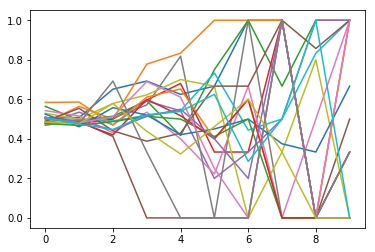

In [3]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[5]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/10
        for v in range(0,10):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g,class_weight = {0:p ,1:1 })
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg ,class_weight = {0:p ,1:1 })
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(10)
        for r in range(0,len(y_test)):
            for v in range(0,10):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

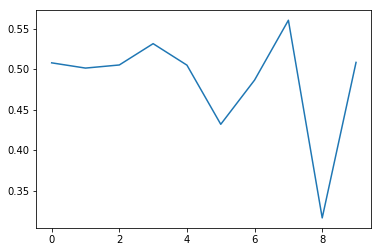

In [8]:
tot=np.zeros(10)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()


Working on... AAPL
4.773580450037433
0.0
Diff in tren train and test
0.5047291487532244
0.5395869191049913
F1,score 0.47124304267161415
G-score: 0.5058998457868102
Window: 5
[[338 197]
 [373 254]]
Vol pos 0.39254071992762957
Vol neg 0.3399122308534215


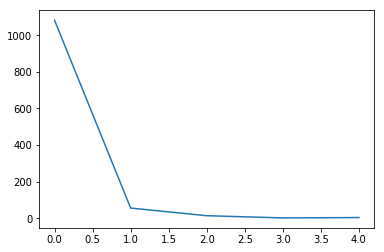

Percentage of gain: 0.033247964380986636
Total gain: 38.63413461070647
000000000000000000000000000000000000000000000000
Percentile:  0
[[319 190]
 [349 224]]
0.5018484288354899
Percentile:  1
[[16  5]
 [15 20]]
0.6428571428571429
Percentile:  2
[[3 2]
 [3 6]]
0.6428571428571429
Percentile:  3
[[2]]
1.0
Percentile:  4
[[0 0]
 [3 1]]
0.25
000000000000000000000000000000000000000000000000
Working on... AMZN
7.308881753895251
0.0
Diff in tren train and test
0.5287035046226618
0.5464716006884681
F1,score 0.45769230769230773
G-score: 0.5059965534121988
Window: 5
[[360 167]
 [397 238]]
Vol pos 0.43671837036090905
Vol neg 0.3285256986442505


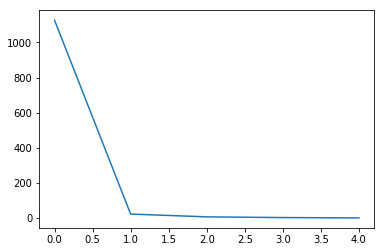

Percentage of gain: 0.06529181707441163
Total gain: 75.86909144046632
000000000000000000000000000000000000000000000000
Percentile:  0
[[347 161]
 [391 227]]
0.5097690941385435
Percentile:  1
[[10  4]
 [ 5  4]]
0.6086956521739131
Percentile:  2
[[3 2]
 [0 2]]
0.7142857142857143
Percentile:  3
[[3]]
1.0
Percentile:  4
[[1]]
1.0
000000000000000000000000000000000000000000000000
Working on... PEP
2.374602523335739
0.0
Diff in tren train and test
0.4720700985761227
0.5891812865497076
F1,score 0.5803921568627451
G-score: 0.5257513064295635
Window: 5
[[141 140]
 [181 222]]
Vol pos 0.31823147319125983
Vol neg 0.3035068325466961


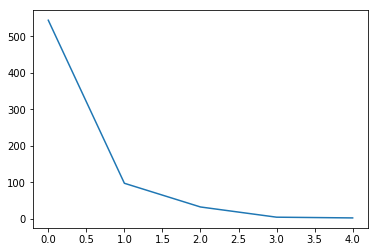

Percentage of gain: 0.026450777077394533
Total gain: 18.09233152093786
000000000000000000000000000000000000000000000000
Percentile:  0
[[121 121]
 [133 169]]
0.5330882352941176
Percentile:  1
[[13 16]
 [31 37]]
0.5154639175257731
Percentile:  2
[[ 3  2]
 [13 14]]
0.53125
Percentile:  3
[[3 1]
 [0 0]]
0.75
Percentile:  4
[[1 0]
 [0 1]]
1.0
000000000000000000000000000000000000000000000000
Working on... GOOGL
3.5436802973977795
0.0
Diff in tren train and test
0.5220382713394969
0.5103270223752151
F1,score 0.5346373268133658
G-score: 0.5056282334257388
Window: 5
[[263 306]
 [265 328]]
Vol pos 0.4482404611582402
Vol neg 0.4071794909302234


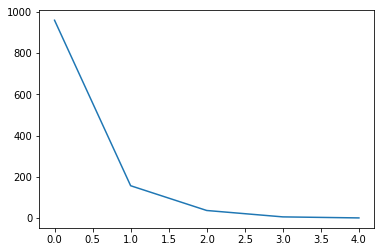

Percentage of gain: 0.02789210260186095
Total gain: 32.41062322336242
000000000000000000000000000000000000000000000000
Percentile:  0
[[221 258]
 [223 257]]
0.4984358706986444
Percentile:  1
[[37 36]
 [35 49]]
0.5477707006369427
Percentile:  2
[[ 4  7]
 [ 5 21]]
0.6756756756756757
Percentile:  3
[[1 3]
 [1 1]]
0.3333333333333333
Percentile:  4
[[0 1]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... MSFT
3.3750512925728415
0.0
Diff in tren train and test
0.5268701633705933
0.5395869191049913
F1,score 0.4716312056737588
G-score: 0.48774270694016736
Window: 5
[[300 235]
 [361 266]]
Vol pos 0.42401503650194267
Vol neg 0.3715582770958581


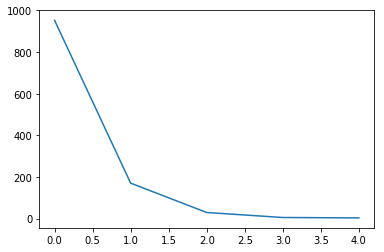

Percentage of gain: 0.01595850043973162
Total gain: 18.54377751096814
000000000000000000000000000000000000000000000000
Percentile:  0
[[246 192]
 [313 201]]
0.4695378151260504
Percentile:  1
[[44 30]
 [40 56]]
0.5882352941176471
Percentile:  2
[[ 7 10]
 [ 5  7]]
0.4827586206896552
Percentile:  3
[[2 1]
 [1 1]]
0.6
Percentile:  4
[[1 1]
 [0 1]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... FB
8.887813391777962
0.0
Diff in tren train and test
0.5159071367153912
0.5473321858864028
F1,score 0.46065259117082535
G-score: 0.5082009134665528
Window: 5
[[360 166]
 [396 240]]
Vol pos 0.47834216651668915
Vol neg 0.45115126203167677


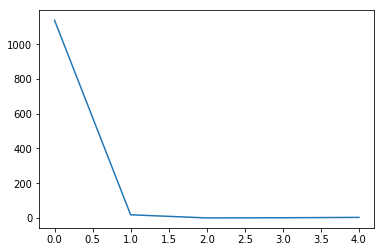

Percentage of gain: 0.028793709680044015
Total gain: 33.45829064821115
000000000000000000000000000000000000000000000000
Percentile:  0
[[357 162]
 [388 231]]
0.5166959578207382
Percentile:  1
[[3 4]
 [7 4]]
0.3888888888888889
Percentile:  2
Percentile:  3
[[1]]
1.0
Percentile:  4
[[3]]
1.0
000000000000000000000000000000000000000000000000
Working on... INTC
4.841390548614877
0.0
Diff in tren train and test
0.5331040412725709
0.5301204819277109
F1,score 0.5425616547334925
G-score: 0.4994109560099093
Window: 5
[[246 300]
 [275 341]]
Vol pos 0.5519265264966938
Vol neg 0.5664934751491907


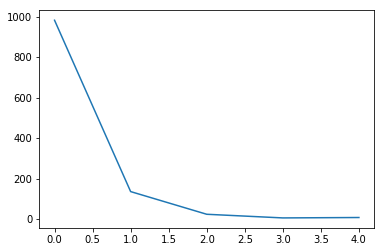

Percentage of gain: -0.0015085001353058387
Total gain: -1.7528771572253845
000000000000000000000000000000000000000000000000
Percentile:  0
[[213 244]
 [235 290]]
0.5122199592668024
Percentile:  1
[[28 41]
 [28 39]]
0.49264705882352944
Percentile:  2
[[ 1 10]
 [ 6  7]]
0.3333333333333333
Percentile:  3
[[0 4]
 [1 1]]
0.16666666666666666
Percentile:  4
[[3 1]
 [1 3]]
0.75
000000000000000000000000000000000000000000000000
Working on... CSCO
4.398891966759002
0.0
Diff in tren train and test
0.5435390238658353
0.5430292598967298
F1,score 0.47822374039282667
G-score: 0.47588467673687396
Window: 5
[[271 260]
 [351 280]]
Vol pos 0.4315079885657413
Vol neg 0.40406158279263305


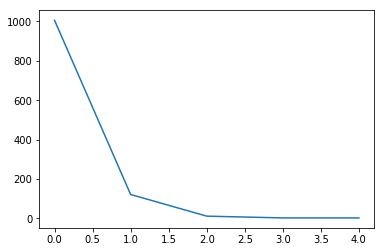

Percentage of gain: -0.007849161262113009
Total gain: -9.120725386575316
000000000000000000000000000000000000000000000000
Percentile:  0
[[231 227]
 [309 239]]
0.4671968190854871
Percentile:  1
[[34 28]
 [31 28]]
0.512396694214876
Percentile:  2
[[4 2]
 [0 5]]
0.8181818181818182
Percentile:  3
[[1 1]
 [0 0]]
0.5
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... CMCSA
4.520795660036167
0.0
Diff in tren train and test
0.4968823908836809
0.5060240963855421
F1,score 0.4915254237288136
G-score: 0.5283591652685586
Window: 5
[[361 213]
 [327 261]]
Vol pos 0.5825362421374588
Vol neg 0.5342141984776074


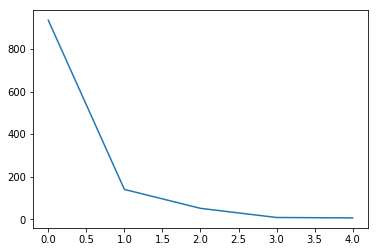

Percentage of gain: 0.06356443668811651
Total gain: 73.86187543159139
000000000000000000000000000000000000000000000000
Percentile:  0
[[291 180]
 [266 198]]
0.5229946524064171
Percentile:  1
[[49 23]
 [33 35]]
0.6
Percentile:  2
[[19  7]
 [10 15]]
0.6666666666666666
Percentile:  3
[[1 3]
 [3 1]]
0.25
Percentile:  4
[[1 0]
 [2 3]]
0.6666666666666666
000000000000000000000000000000000000000000000000
Working on... NVDA
4.5136708118745545
0.0010269576379964985
Diff in tren train and test
0.5253654342218401
0.5378657487091222
F1,score 0.4451038575667655
G-score: 0.5020627840281983
Window: 5
[[376 161]
 [400 225]]
Vol pos 0.6082476696212866
Vol neg 0.5449511383542807


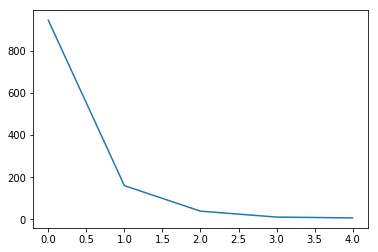

Percentage of gain: 0.05149678212189485
Total gain: 59.839260825641816
000000000000000000000000000000000000000000000000
Percentile:  0
[[316 124]
 [336 167]]
0.5121951219512195
Percentile:  1
[[41 26]
 [54 39]]
0.5
Percentile:  2
[[12  6]
 [ 9 12]]
0.6153846153846154
Percentile:  3
[[3 5]
 [0 3]]
0.5454545454545454
Percentile:  4
[[3 0]
 [1 3]]
0.8571428571428571
000000000000000000000000000000000000000000000000
Working on... NFLX
3.8751268005680726
0.0
Diff in tren train and test
0.5201032036121265
0.540447504302926
F1,score 0.5394524959742352
G-score: 0.5047101553795482
Window: 5
[[255 279]
 [293 335]]
Vol pos 0.5709800538405153
Vol neg 0.6050145448272422


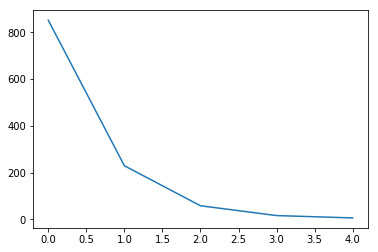

Percentage of gain: -0.007908853593182868
Total gain: -9.190087875278493
000000000000000000000000000000000000000000000000
Percentile:  0
[[207 227]
 [195 222]]
0.5041128084606346
Percentile:  1
[[42 31]
 [71 85]]
0.5545851528384279
Percentile:  2
[[ 3 14]
 [21 20]]
0.39655172413793105
Percentile:  3
[[2 5]
 [4 5]]
0.4375
Percentile:  4
[[1 2]
 [1 2]]
0.5
000000000000000000000000000000000000000000000000
Working on... BKNG
1.6144990738787033
6.591425854902371e-05
Diff in tren train and test
0.5090600226500567
0.5079365079365079
F1,score 0.5124378109452735
G-score: 0.5485407657521021
Window: 5
[[142  75]
 [121 103]]
Vol pos 0.2679016571979967
Vol neg 0.31855003022627865


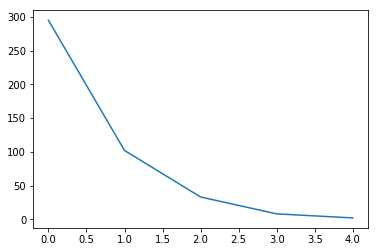

Percentage of gain: 0.007256462787207652
Total gain: 3.2001000891585747
000000000000000000000000000000000000000000000000
Percentile:  0
[[96 52]
 [74 72]]
0.5714285714285714
Percentile:  1
[[32 10]
 [35 25]]
0.5588235294117647
Percentile:  2
[[10  6]
 [11  6]]
0.48484848484848486
Percentile:  3
[[3 4]
 [1 0]]
0.375
Percentile:  4
[[0 2]
 [0 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... ADBE
3.2369780539910624
0.0
Diff in tren train and test
0.5487962166809974
0.5456110154905336
F1,score 0.46070460704607047
G-score: 0.4859474940982424
Window: 5
[[310 218]
 [379 255]]
Vol pos 0.48032483302104045
Vol neg 0.46552128124643155


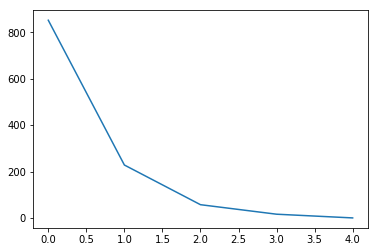

Percentage of gain: -0.00562192276009621
Total gain: -6.532674247231796
000000000000000000000000000000000000000000000000
Percentile:  0
[[239 158]
 [281 174]]
0.4847417840375587
Percentile:  1
[[53 40]
 [76 59]]
0.49122807017543857
Percentile:  2
[[10 16]
 [15 16]]
0.45614035087719296
Percentile:  3
[[7 4]
 [2 3]]
0.625
Percentile:  4
000000000000000000000000000000000000000000000000
Working on... AMGN
3.401709401709401
0.0
Diff in tren train and test
0.5054826918942164
0.5301204819277109
F1,score 0.5193097781429744
G-score: 0.4951959881174706
Window: 5
[[261 285]
 [300 316]]
Vol pos 0.44464502355381574
Vol neg 0.4559134302369808


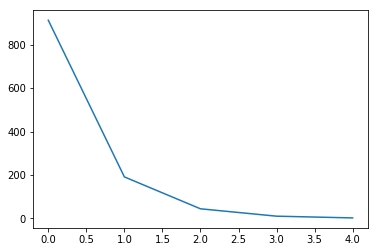

Percentage of gain: -0.008734232442411425
Total gain: -10.149178098082075
000000000000000000000000000000000000000000000000
Percentile:  0
[[215 221]
 [234 243]]
0.5016429353778752
Percentile:  1
[[36 49]
 [52 54]]
0.4712041884816754
Percentile:  2
[[ 5 12]
 [12 15]]
0.45454545454545453
Percentile:  3
[[2 3]
 [2 3]]
0.5
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... TXN
4.164969450101836
0.0
Diff in tren train and test
0.5557944528058482
0.5593803786574871
F1,score 0.5118949958982774
G-score: 0.48894018039019865
Window: 5
[[255 257]
 [338 312]]
Vol pos 0.44402074504434447
Vol neg 0.4680916807608898


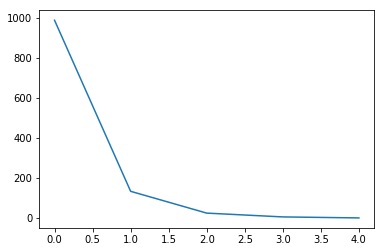

Percentage of gain: -0.023024774193275484
Total gain: -26.754787612586114
000000000000000000000000000000000000000000000000
Percentile:  0
[[219 223]
 [277 270]]
0.49443882709807885
Percentile:  1
[[28 27]
 [47 32]]
0.44776119402985076
Percentile:  2
[[8 7]
 [5 5]]
0.52
Percentile:  3
[[0 0]
 [3 3]]
0.5
Percentile:  4
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... AVGO
3.4749471777844883
0.0
Diff in tren train and test
0.5183831434100193
0.5559380378657487
F1,score 0.5427215189873418
G-score: 0.497982947603501
Window: 5
[[241 275]
 [303 343]]
Vol pos 0.4972299936671011
Vol neg 0.4674934463322019


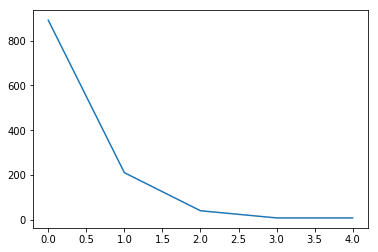

Percentage of gain: 0.017358953805141412
Total gain: 20.17110432157432
000000000000000000000000000000000000000000000000
Percentile:  0
[[186 218]
 [216 271]]
0.5129068462401796
Percentile:  1
[[34 52]
 [68 56]]
0.42857142857142855
Percentile:  2
[[ 9  5]
 [15 11]]
0.5
Percentile:  3
[[4 0]
 [2 2]]
0.75
Percentile:  4
[[7 0]
 [1 0]]
0.875
000000000000000000000000000000000000000000000000
Working on... PYPL
5.473098330241182
0.0
Diff in tren train and test
0.5421324161650903
0.5499139414802066
F1,score 0.5056669572798606
G-score: 0.5144552992394129
Window: 5
[[305 218]
 [349 290]]
Vol pos 0.5717786983992346
Vol neg 0.5324682744966881


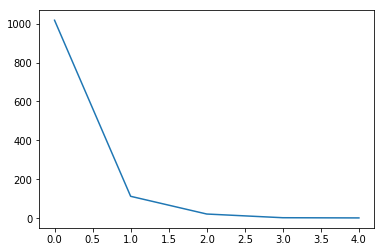

Percentage of gain: 0.032959392347609646
Total gain: 38.29881390792241
000000000000000000000000000000000000000000000000
Percentile:  0
[[265 193]
 [310 249]]
0.5054080629301868
Percentile:  1
[[30 20]
 [32 31]]
0.5398230088495575
Percentile:  2
[[6 4]
 [6 6]]
0.5454545454545454
Percentile:  3
[[1 1]
 [1 0]]
0.3333333333333333
Percentile:  4
[[2]]
1.0
000000000000000000000000000000000000000000000000
Working on... GILD
7.556849694952859
0.0
Diff in tren train and test
0.5032258064516129
0.5292598967297762
F1,score 0.5898161244695899
G-score: 0.45225021140077265
Window: 5
[[165 382]
 [198 417]]
Vol pos 0.462465717118811
Vol neg 0.4388288072921124


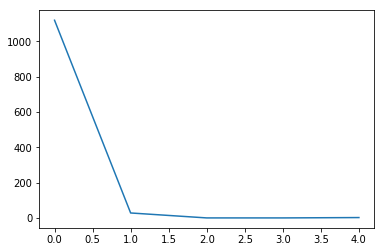

Percentage of gain: 0.012594095640036874
Total gain: 14.634339133722847
000000000000000000000000000000000000000000000000
Percentile:  0
[[162 370]
 [193 395]]
0.4973214285714286
Percentile:  1
[[ 0  9]
 [ 1 19]]
0.6551724137931034
Percentile:  2
[[0 1]
 [0 0]]
0.0
Percentile:  3
[[1]]
1.0
Percentile:  4
[[1 2]
 [0 0]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Working on... COST
2.3891650603631978
0.0
Diff in tren train and test
0.5283748925193466
0.5507745266781411
F1,score 0.46226415094339623
G-score: 0.5044551278891313
Window: 5
[[347 175]
 [395 245]]
Vol pos 0.3285912984580356
Vol neg 0.3367938109122472


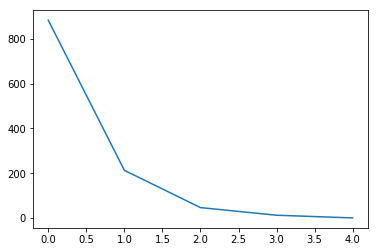

Percentage of gain: 0.0021975701094459183
Total gain: 2.553576467176157
000000000000000000000000000000000000000000000000
Percentile:  0
[[269 138]
 [299 176]]
0.5045351473922902
Percentile:  1
[[65 33]
 [61 54]]
0.5586854460093896
Percentile:  2
[[ 7  3]
 [24 13]]
0.425531914893617
Percentile:  3
[[6 1]
 [6 0]]
0.46153846153846156
Percentile:  4
[[0 0]
 [1 0]]
0.0
000000000000000000000000000000000000000000000000
Working on... QCOM
4.096021487325832
0.0
Diff in tren train and test
0.5124677558039553
0.5507745266781411
F1,score 0.45652173913043476
G-score: 0.4835661349769561
Window: 5
[[310 212]
 [388 252]]
Vol pos 0.477863979400917
Vol neg 0.49530705215446197


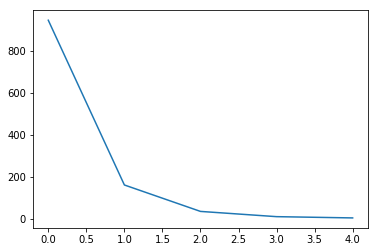

Percentage of gain: -0.024633971488263164
Total gain: -28.624674869361794
000000000000000000000000000000000000000000000000
Percentile:  0
[[253 176]
 [313 203]]
0.48253968253968255
Percentile:  1
[[51 31]
 [43 35]]
0.5375
Percentile:  2
[[ 6  5]
 [16  7]]
0.38235294117647056
Percentile:  3
[[0 0]
 [6 3]]
0.3333333333333333
Percentile:  4
[[0 0]
 [2 1]]
0.3333333333333333
000000000000000000000000000000000000000000000000
Mean gain over portfolio :  16.872115694254944


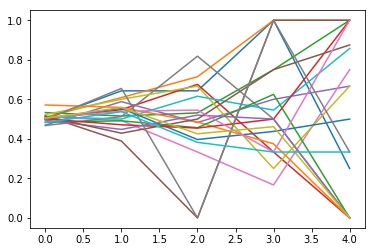

In [9]:
import warnings
warnings.filterwarnings('ignore')
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]
chartlist=[]
gainlist=[]
for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[5]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    percpostotal=[]
    percnegtotal=[]
    
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        yvolatility=[]
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                
                y.append(0)
            else:
                y.append(1)
            yvolatility.append((100*abs(price.iloc[i+t+1]['close']-price.iloc[i+1]['open']))/price.iloc[i+1]['open'])
            x.append(xtemp[i])
        y=np.array(y)
        yvolatility=np.array(yvolatility)
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
        yvolatilitytest=yvolatility[testindex]
        #create structure for percentile valuation
        distribution=[]
        print(max(yvolatilitytest))
        print(min(yvolatilitytest))
        step=(max(yvolatilitytest)-min(yvolatilitytest))/5
        for v in range(0,5):
            pindexes=[]
            for r in range(0,len(y_test)):
                if(yvolatilitytest[r]<min(yvolatilitytest)+step+step*v and yvolatilitytest[r]>min(yvolatilitytest)+step*v):
                    pindexes.append(r)
            distribution.append(pindexes)

        cspace=np.logspace(-4,4,10)
        gspace=np.logspace(-4,4,10)
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(kernel='rbf',C=c,gamma=g,class_weight = {0:p ,1:1 })
                    x_train,y_train=smote(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    
                    
                    if(sum(y_val)+6<len(x_val) and sum(y_val)>6):
                        x_val,y_val=smote(x_val,y_val)
                    else:
                        totu=totu+1
                    prediction=rbf_svm.predict(x_val)
                    
                    cvacclist.append(geometric_mean_score(y_val, prediction))
                    
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    maxg=g
                    maxc=c
                    bestsvm=rbf_svm

        
        print('Diff in tren train and test')
        print(sum(y_tv)/len(y_tv))
        print(sum(y_test)/len(y_test))
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        rbf_svm=svm.SVC(kernel='rbf',C=maxc, gamma=maxg ,class_weight = {0:p ,1:1 })
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        volr=[]
        voln=[]
        for j in range(0,len(x_test)):
            if(y_test[j]==prediction[j]):
                volr.append(yvolatilitytest[j])
            else:
                voln.append(yvolatilitytest[j])
        confmatrix=confusion_matrix(y_test, prediction)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=geometric_mean_score(y_test, prediction)
        
        print('F1,score',CM)
        print('G-score:',valueacc)
        print('Window:',t)
        print(confmatrix)
        print('Vol pos',sum(volr)/len(volr))
        print('Vol neg',sum(voln)/len(voln))
        percnegtotal.append(sum(volr)/len(volr))
        percpostotal.append(sum(voln)/len(voln))
        #build structure to plot distribution onver percentile
        chart=np.zeros(5)
        for r in range(0,len(y_test)):
            for v in range(0,5):
                if(yvolatilitytest[r]<min(yvolatility)+step+step*v and yvolatilitytest[r]>min(yvolatility)+step*v):
                    chart[v]+=1
        plt.plot(chart)
        plt.show()
        
        print('Percentage of gain:',(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('Total gain:',len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        gainlist.append(len(y_test)*(sum(volr)-sum(voln))/(len(volr)+len(voln)))
        print('000000000000000000000000000000000000000000000000')
        #performances for each percentile
        chartscore=[]
        for g in range(0,len(distribution)):
            print('Percentile: ',g)
            tempscore=0
            if(len(distribution[g])>0):
                predictionp=rbf_svm.predict(x_test[distribution[g]])
                print(confusion_matrix(y_test[distribution[g]], predictionp))
                print(rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]]))
                tempscore=rbf_svm.score(x_test[distribution[g]],y_test[distribution[g]])
            chartscore.append(tempscore)    
        chartlist.append(chartscore)
        print('000000000000000000000000000000000000000000000000')
print('Mean gain over portfolio : ', sum(gainlist)/len(gainlist))
#print all the accuracy varing the percentile
for st in range(0,len(chartlist)):
    plt.plot(chartlist[st])
plt.show()
        

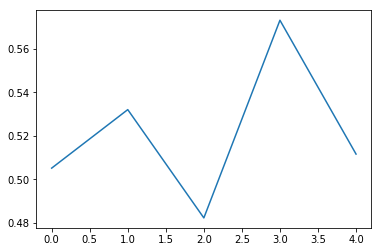

In [11]:
tot=np.zeros(5)
for st in range(0,len(chartlist)):
    tot=chartlist[st]+tot
    
tot=tot/20
plt.plot(tot)
plt.show()